In [1]:
#importing necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
# summary dataframe creation
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
PageExitRate_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv',index_col=0)
PageRevenue_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv ',index_col=0)
PageSize_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv',index_col=0)
PageSpeed_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv',index_col=0)
PageViewingTime_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv',index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['PageExitRate'] = PageExitRate_data.values
summary_data['PageRevenue'] = PageRevenue_data.values
summary_data['PageSize'] = PageSize_data.values
summary_data['PageSpeed'] = PageSpeed_data.values
summary_data['PageViewingTime'] = PageViewingTime_data.values
summary_data['Sum of Daily Hits'] = data.sum().values
print(summary_data.head())


     PageExitRate  PageRevenue    PageSize  PageSpeed  PageViewingTime  \
001     24.759071  1972.142118  106.153936   7.601041       175.438381   
002     18.458663   101.836934   79.352399   7.079163        75.474441   
003     47.518158   196.146652   48.208457   4.714836        10.027850   
004     32.354706   102.653630  105.709602  13.995231       117.802372   
005     45.828504     3.060067   43.593542   5.622858        12.522355   

     Sum of Daily Hits  
001             379682  
002              17401  
003              27249  
004              11668  
005                533  


In [6]:
summary_data.shape

(167, 6)

cluster0 = ['005', '006', '007', '008', '009', '011', '012', '013', '014', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '

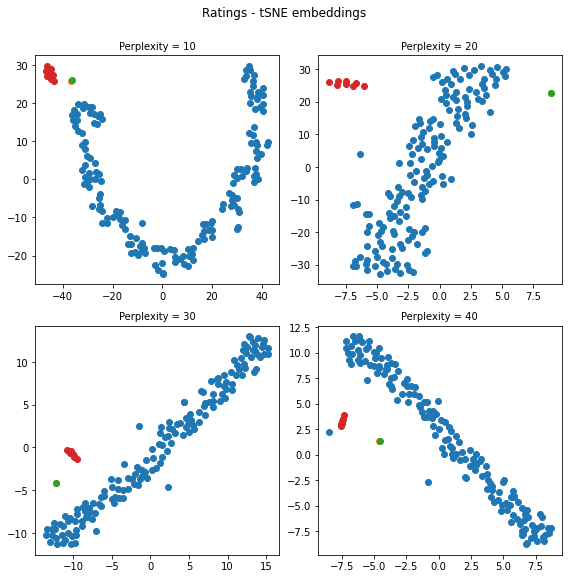

In [20]:
#clustering data and perplexting by tsnme 
k = 4
#raw_data = ratings
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = False
perplexities = [10, 20, 30, 40]

clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
summary_data['label'] = k_means.fit_predict(summary_data)
for c in range(k):
    cluster = summary_data[summary_data['label'] == c]
    print('cluster' + str(c) + ' = ' + str(list(cluster.index)))
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ratings - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title('Perplexity = ' + str(p), fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1])
    if annotate:
        for i, name in enumerate(clustered_data.index):
            sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

In [21]:
 rows = ['001','015','003','080','156','155','048','002','010','004']
 summary_data = summary_data.drop(index=rows)

cluster0 = ['008', '017', '018', '021', '025', '028', '034', '037', '038', '041', '045', '051', '055', '062', '067', '071', '075', '078', '084', '088', '092', '097', '104', '108', '114', '118', '121', '122', '125', '130', '133', '134', '137', '141', '147', '151', '158', '167']
cluster1 = ['006', '013', '014', '016', '023', '027', '031', '032', '043', '047', '049', '053', '056', '060', '065', '066', '069', '073', '076', '083', '086', '090', '099', '110', '112', '116', '120', '127', '128', '132', '139', '143', '145', '149', '152', '161', '162', '163', '165']
cluster2 = ['005', '009', '012', '019', '022', '026', '029', '030', '035', '039', '042', '046', '052', '059', '063', '064', '068', '072', '079', '081', '082', '085', '089', '093', '098', '101', '102', '105', '106', '109', '115', '119', '123', '126', '131', '135', '138', '142', '144', '148', '159', '160', '164']
cluster3 = ['007', '011', '020', '024', '033', '036', '040', '044', '050', '054', '057', '058', '061', '070', '074', '077', 

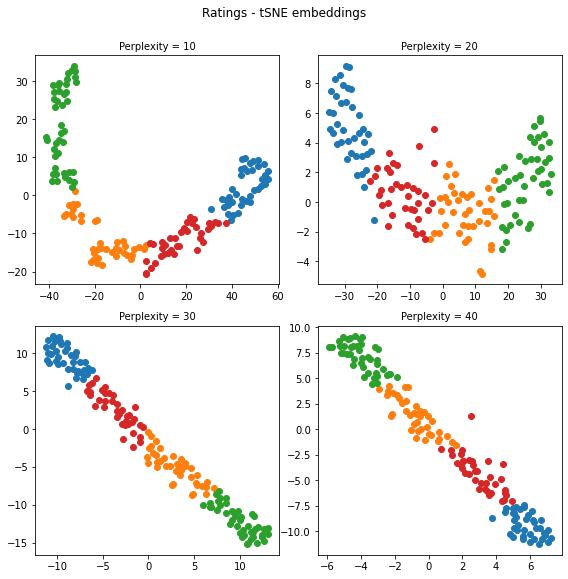

In [22]:
k = 4
#raw_data = ratings
# raw_data = raw_data / raw_data.max()  # to normalise the data, if required
annotate = False
perplexities = [10, 20, 30, 40]

clusters = []
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
summary_data['label'] = k_means.fit_predict(summary_data)
for c in range(k):
    cluster = summary_data[summary_data['label'] == c]
    print('cluster' + str(c) + ' = ' + str(list(cluster.index)))
    clusters.append(cluster.drop(['label'], axis=1))
clustered_data = pd.concat(clusters)

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ratings - tSNE embeddings', position=(0.5, 1.0))
for p in perplexities:
    embedding = TSNE(n_components=2, random_state=0, perplexity=p).fit_transform(clustered_data.values)
    embedded_clusters = []
    cluster_start = 0
    for cluster in clusters:
        cluster_end = cluster_start + cluster.shape[0]
        embedded_clusters.append(embedding[cluster_start:cluster_end, :])
        cluster_start = cluster_end
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title('Perplexity = ' + str(p), fontsize=10)
    for embedded_cluster in embedded_clusters:
        sub.scatter(embedded_cluster[:, 0], embedded_cluster[:, 1])
    if annotate:
        for i, name in enumerate(clustered_data.index):
            sub.annotate(name, (embedding[i, 0] + 5, embedding[i, 1]))
    counter += 1
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

No, In my point of view the tsnme is not seeing the same clusters as K-means